In [1]:
# Import 需要的套件
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [3]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier

In [4]:
droot = './data/data-science-london-scikit-learn'

In [5]:
train_df = pd.read_csv(os.path.join(droot, 'train.csv'), header=None)
test_df = pd.read_csv(os.path.join(droot, 'test.csv'), header=None)

In [6]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [7]:
test_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,...,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.011814,0.004261,-0.001708,0.008614,1.262429,0.006003,0.480585,-0.017228,0.006883,-0.006664,...,-0.018914,0.007282,-0.476895,0.016175,-0.508713,-0.002295,0.451234,-0.002042,-1.003258,0.539873
std,1.009514,1.011432,0.996685,0.989010,4.527492,0.999623,2.102394,2.204673,0.989207,0.991570,...,1.003450,1.003326,2.202519,1.015779,2.097448,1.008415,2.187677,1.000152,1.979629,2.011646
min,-3.568633,-4.238067,-3.587473,-3.646144,-17.296514,-3.500646,-9.157707,-7.867021,-4.037177,-3.666707,...,-4.545617,-3.914329,-8.510309,-4.702577,-8.860839,-3.579675,-9.034930,-3.820679,-8.174851,-7.945400
25%,-0.669886,-0.678792,-0.665240,-0.662560,-1.669099,-0.688766,-0.894049,-1.521762,-0.654169,-0.665439,...,-0.689220,-0.664532,-1.986040,-0.673810,-1.908190,-0.689363,-1.071005,-0.667359,-2.293291,-0.717376
50%,0.006104,0.010758,0.007384,0.009027,1.123982,0.011476,0.534536,-0.021020,-0.006291,-0.005408,...,-0.033990,-0.003370,-0.459278,0.013170,-0.481508,-0.000858,0.419585,-0.003255,-1.004007,0.637040
75%,0.703350,0.684755,0.658111,0.683506,4.002391,0.690966,1.890960,1.460165,0.676678,0.654349,...,0.655757,0.682167,1.026158,0.691832,0.957351,0.666330,1.938350,0.667539,0.321595,1.897324
max,3.843549,3.538868,3.716102,3.667817,20.551947,4.565496,7.882210,7.391208,3.706671,3.322649,...,3.624639,4.251316,8.598575,4.157051,6.851583,3.911722,8.624332,3.860112,7.125848,9.464492


In [8]:
print(train_df.shape)

(1000, 40)


In [9]:
print(test_df.shape)

(9000, 40)


In [10]:
target = np.loadtxt(os.path.join(droot, 'trainLabels.csv'))

In [11]:
data = np.array(train_df)

In [12]:
#x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)
sets = train_test_split(data, target, test_size=0.25, random_state=42)

In [13]:
def RFC_grid(sets):
    print('RandomForestClassifier')
    x_train, x_test, y_train, y_test = sets
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    print('default acc=%f, mes=%f' % (round(metrics.accuracy_score(y_test, y_pred),2), mse))
    
    # grid
    param_grid = dict(n_estimators=[2,5,9,11,13], max_features=[None, 'log2', 'sqrt']) 
    grid_search = GridSearchCV(rf, param_grid, n_jobs=4, verbose=1, cv=5)
    grid_result = grid_search.fit(x_train, y_train)
    
    print("grid search acc=%f, using %s" % (-grid_result.best_score_, grid_result.best_params_))
    
    # final
    p = grid_result.best_params_
    rf_gs = RandomForestClassifier(n_estimators=p['n_estimators'], max_features=p['max_features'])
    rf_gs.fit(x_train, y_train)
    y_pred = rf_gs.predict(x_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    print('final acc=%f, mse=%f' % (round(metrics.accuracy_score(y_test, y_pred),2), mse))
    return rf, rf_gs
    
    

In [14]:
RFC_grid(sets)

RandomForestClassifier
default acc=0.820000, mes=0.184000
Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    2.1s finished


grid search acc=-0.826667, using {'max_features': None, 'n_estimators': 11}
final acc=0.840000, mse=0.156000


(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False))

In [15]:
rf1, rf2 = RFC_grid(sets)

RandomForestClassifier
default acc=0.810000, mes=0.192000
Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    1.4s finished


grid search acc=-0.844000, using {'max_features': None, 'n_estimators': 13}
final acc=0.830000, mse=0.172000


In [16]:
test_data = np.array(test_df)

In [17]:
pred_rf1 = rf1.predict(test_data)
pred_rf2 = rf2.predict(test_data)

In [18]:
pred_rf1.shape

(9000,)

In [19]:
d1 = {'Id':np.arange(1,len(pred_rf1)+1,1,dtype=np.int), 'Solution':pred_rf1}
d2 = {'Id':np.arange(1,len(pred_rf1)+1,1,dtype=np.int), 'Solution':pred_rf2}

In [20]:
df1 = pd.DataFrame(data=d1, index=None, dtype=np.int)
df2 = pd.DataFrame(data=d2, index=None, dtype=np.int)

In [21]:
print(df1['Solution'].shape)
print(df2['Solution'].shape)

(9000,)
(9000,)


In [22]:
df1.to_csv('submission.csv', index=False)

https://necromuralist.github.io/kaggle-competitions/posts/set-up-the-kaggle-command-line-command/

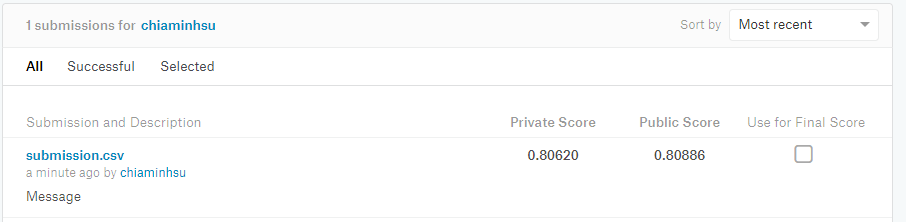